In [42]:
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from bs import bsformula
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import RBF
from sklearn import preprocessing
%matplotlib inline

In [44]:
'''Certainly! Let's break down the code line by line:

```python
def bsformula(cp, s, k, rf, t, v, div):
```
This line defines a function named `bsformula` that calculates the price of an option using the Black-Scholes model. The function takes the following parameters:
- `cp`: +1 for a call option, -1 for a put option
- `s`: initial stock price
- `k`: strike price
- `rf`: risk-free interest rate
- `t`: time to expiration (in years)
- `v`: volatility of the stock
- `div`: dividend yield

```python
    """ Price an option using the Black-Scholes model.
    cp: +1/-1 for call/put
    s: initial stock price
    k: strike price
    t: expiration time
    v: volatility
    rf: risk-free rate
    div: dividend
    """
```
This is a docstring that describes what the function does and explains each parameter.

```python
    d1 = (np.log(s/k)+(rf-div+0.5*v*v)*t)/(v*np.sqrt(t))
```
This line calculates `d1`, a term used in the Black-Scholes formula. It represents a standardized measure of the distance between the current stock price and the strike price. The formula for `d1` is:
\[ d1 = \frac{\log(\frac{s}{k}) + (rf - div + 0.5 \cdot v^2) \cdot t}{v \cdot \sqrt{t}} \]
- `np.log(s/k)`: the natural logarithm of the ratio of the stock price to the strike price
- `(rf - div + 0.5 * v * v) * t`: the adjusted drift of the stock price over time
- `v * np.sqrt(t)`: the standard deviation of the stock's returns over time

```python
    d2 = d1 - v * np.sqrt(t)
```
This line calculates `d2`, another term used in the Black-Scholes formula. It is derived from `d1` by subtracting the standard deviation of the stock's returns over time:
\[ d2 = d1 - v \cdot \sqrt{t} \]

```python
    optprice = (cp * s * np.exp(-div * t) * st.norm.cdf(cp * d1)) - (cp * k * np.exp(-rf * t) * st.norm.cdf(cp * d2))
```
This line calculates the option price using the Black-Scholes formula:
\[ \text{optprice} = cp \cdot s \cdot e^{-div \cdot t} \cdot N(cp \cdot d1) - cp \cdot k \cdot e^{-rf \cdot t} \cdot N(cp \cdot d2) \]
- `cp * s * np.exp(-div * t) * st.norm.cdf(cp * d1)`: the present value of the expected payoff of the stock price at expiration, adjusted for dividends
- `cp * k * np.exp(-rf * t) * st.norm.cdf(cp * d2)`: the present value of the expected payoff of the strike price at expiration, adjusted for the risk-free rate
- `st.norm.cdf()`: the cumulative distribution function of the standard normal distribution

```python
    delta = cp * st.norm.cdf(cp * d1)
```
This line calculates the delta of the option, which measures the sensitivity of the option price to changes in the stock price. It is the derivative of the option price with respect to the stock price:
\[ \Delta = cp \cdot N(cp \cdot d1) \]

```python
    vega = s * np.sqrt(t) * st.norm.pdf(d1)
```
This line calculates the vega of the option, which measures the sensitivity of the option price to changes in volatility. It is the derivative of the option price with respect to volatility:
\[ \text{vega} = s \cdot \sqrt{t} \cdot N'(d1) \]
- `st.norm.pdf(d1)`: the probability density function of the standard normal distribution

```python
    return optprice, delta, vega
```
This line returns the calculated option price, delta, and vega as a tuple.

In summary, the function `bsformula` calculates and returns the price, delta, and vega of an option using the Black-Scholes model based on the given parameters.'''






r = 0.0002  # risk-free rate
S= 100      # Underlying spot
KC = 130    # Call strike
KP = 70     # Put strike
sigma = 0.4 # implied volatility
T = 2.0     # Time to maturity

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
C:\Users\adebo\AppData\Local\Temp\ipykernel_19220\2144580475.py:1: SyntaxWarning: invalid escape sequence '\['
  '''Certainly! Let's break down the code line by line:


In [45]:
#defining call functions
call = lambda x: bsformula(1,lb+(ub-lb)*x,KC,r,T,sigma,0)[0]
put = lambda x: bsformula(-1,lb+(ub-lb)*x,KP,r,T,sigma,0)[0]

In [46]:
lb = 0.001
ub = 300

training_num = 5
testing_number = 100

np.random.seed(0)

In [47]:
train_x_1 = np.array(np.linspace(0,1,training_num), dtype='float32').reshape(training_num,1)
train_y_1 = [call(S) for S in train_x_1]

min_max_scaler = preprocessing.MinMaxScaler()

#train_x_1 = min_max_scaler.fit_transform(train_x_1)
#train_y_1 = min_max_scaler.fit_transform(train_y_1)


'''Sure! Let's break down the code line by line:

```python
lb = 0.001           # lower bound on domain
```
This line sets the variable `lb` to `0.001`, which represents the lower bound of the domain for some later operation or data range.

```python
ub = 300             # upper bound on domain
```
This line sets the variable `ub` to `300`, which represents the upper bound of the domain for some later operation or data range.

```python
training_number = 5  # Number of training samples
```
This line sets the variable `training_number` to `5`, indicating that there will be 5 training samples.

```python
testing_number = 100 # Number of testing samples
```
This line sets the variable `testing_number` to `100`, indicating that there will be 100 testing samples.

```python
np.random.seed(0)
```
This line sets the seed for NumPy's random number generator to `0`. Setting the seed ensures that the random numbers generated are reproducible, meaning you will get the same random numbers each time you run the code.

```python
train_x_1 = np.array(np.linspace(0, 1, training_number), dtype='float32').reshape(training_number, 1)
```
This line creates an array of training inputs `train_x_1`:
- `np.linspace(0, 1, training_number)`: generates `training_number` (5) evenly spaced values between `0` and `1`.
- `np.array(..., dtype='float32')`: converts the generated values to a NumPy array with a data type of `float32`.
- `.reshape(training_number, 1)`: reshapes the array to have `training_number` rows and `1` column. This is necessary for compatibility with certain machine learning algorithms that expect a 2D array of input features.

```python
train_y_1 = [call(S) for S in train_x_1]
```
This line creates a list `train_y_1` by applying a function `call` to each element `S` in `train_x_1`:
- `[call(S) for S in train_x_1]`: list comprehension that iterates over each element `S` in `train_x_1`, applies the `call` function to it, and stores the result in `train_y_1`.

To summarize, this code sets up the domain bounds, specifies the number of training and testing samples, seeds the random number generator for reproducibility, generates a set of training input values, and computes corresponding training output values by applying a `call` function to each training input.'''

"Sure! Let's break down the code line by line:\n\n```python\nlb = 0.001           # lower bound on domain\n```\nThis line sets the variable `lb` to `0.001`, which represents the lower bound of the domain for some later operation or data range.\n\n```python\nub = 300             # upper bound on domain\n```\nThis line sets the variable `ub` to `300`, which represents the upper bound of the domain for some later operation or data range.\n\n```python\ntraining_number = 5  # Number of training samples\n```\nThis line sets the variable `training_number` to `5`, indicating that there will be 5 training samples.\n\n```python\ntesting_number = 100 # Number of testing samples\n```\nThis line sets the variable `testing_number` to `100`, indicating that there will be 100 testing samples.\n\n```python\nnp.random.seed(0)\n```\nThis line sets the seed for NumPy's random number generator to `0`. Setting the seed ensures that the random numbers generated are reproducible, meaning you will get the same

In [48]:
test_x_1 = np.array(np.linspace(0, 1, testing_number), dtype='float32').reshape(testing_number, 1)
test_y_1 = [call(S) for S in test_x_1]

In [49]:
#create gaussian process estimator with RBF kernel

sk_kernel = RBF(length_scale=1.0,length_scale_bounds=(1e-05,1000.0))

gp = gaussian_process.GaussianProcessRegressor(kernel=sk_kernel,n_restarts_optimizer=20)
gp.fit(train_x_1,train_y_1)

c:\Users\adebo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


GaussianProcessRegressor(kernel=RBF(length_scale=1), n_restarts_optimizer=20)

In [50]:
y_pred_1,sigma_1 = gp.predict(test_x_1,return_std=True)

Text(0, 0.5, 'V')

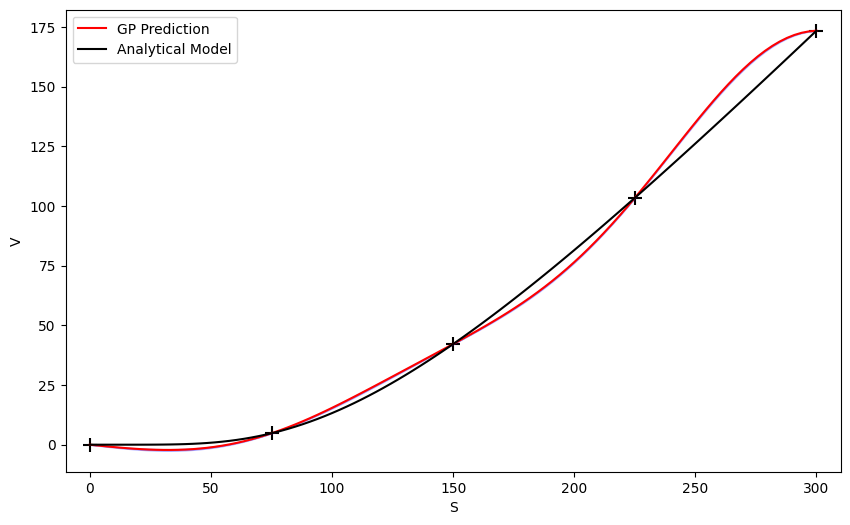

In [52]:
plt.figure(figsize = (10, 6), facecolor='white', edgecolor='black')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), y_pred_1, color = 'red', label = 'GP Prediction')
plt.plot(lb+(ub-lb)*test_x_1.flatten(), test_y_1, color = 'black', label = 'Analytical Model')
plt.scatter(lb+(ub-lb)*train_x_1, train_y_1, color = 'black', marker = '+', s = 100) 
plt.fill_between(lb+(ub-lb)*test_x_1.flatten(), (y_pred_1.T-2*sigma_1).flatten(), (y_pred_1.T+2*sigma_1).flatten(), color = 'blue', alpha=0.3)
plt.legend(loc = 'best', prop={'size':10})
plt.xlim([lb-10, ub+10])
plt.xlabel('S')
plt.ylabel('V')

In [62]:

%pip install libgsl-dev 
%pip install ttps://github.com/junyanxu/Python-Heston-Option-Pricer.git



Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement libgsl-dev (from versions: none)
ERROR: No matching distribution found for libgsl-dev


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'ttps://github.com/junyanxu/Python-Heston-Option-Pricer.git'


In [58]:
import PyHeston

ModuleNotFoundError: No module named 'PyHeston'